# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Alifina Aulia Azzahra
- Email: alifinaauliaa@gmail.com
- Id Dicoding: alifinaaa

## Persiapan

### Menyiapkan library yang dibutuhkan

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import math

### Menyiapkan data yang akan diguankan

In [7]:
# Load dataset
url = "https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/students_performance/data.csv"
df = pd.read_csv(url, sep=';')
df

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


## Data Understanding

In [9]:
# Melihat informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

Berdasarkan informasi di atas, diperoleh bahwa terdapat 4424 data dengan 37 kolom pada dataset performa murid. Kolom seperti Status yang merupakan target termasuk ke dalam kolom kategorikal karena memiliki tipe data string. Sedangkan, kolom lainnya termasuk ke dalam kolom numerik memiliki tipe data integer atau float. 

In [68]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Marital_status,4424.0,1.178571,0.605747,1.00,1.00,1.000000,1.000000,6.000000
Application_mode,4424.0,18.669078,17.484682,1.00,1.00,17.000000,39.000000,57.000000
Application_order,4424.0,1.727848,1.313793,0.00,1.00,1.000000,2.000000,9.000000
Course,4424.0,8856.642631,2063.566416,33.00,9085.00,9238.000000,9556.000000,9991.000000
Daytime_evening_attendance,4424.0,0.890823,0.311897,0.00,1.00,1.000000,1.000000,1.000000
Previous_qualification,4424.0,4.577758,10.216592,1.00,1.00,1.000000,1.000000,43.000000
Previous_qualification_grade,4424.0,132.613314,13.188332,95.00,125.00,133.100000,140.000000,190.000000
Nacionality,4424.0,1.873192,6.914514,1.00,1.00,1.000000,1.000000,109.000000
Mothers_qualification,4424.0,19.561935,15.603186,1.00,2.00,19.000000,37.000000,44.000000
Fathers_qualification,4424.0,22.275316,15.343108,1.00,3.00,19.000000,37.000000,44.000000


Berdasarkan tabel statistik deskriptif pada dataset, dapat disimpulkan bahwa :

1. Status Pernikahan dan Pendaftaran
   - Sebagian besar siswa belum menikah (rata-rata ≈ 1.18).
   - Mayoritas mendaftar melalui jalur aplikasi umum (mean kode aplikasi ≈ 18.7).
   - Sebagian besar siswa diterima di pilihan pertama atau kedua (mean ≈ 1.73).

2. Program Studi dan Jadwal Kuliah
   - Siswa tersebar di berbagai program studi dengan kode unik (mean kode program ≈ 8856).
   - Hampir seluruh siswa memilih kuliah di jadwal siang (mean waktu kuliah ≈ 0.89).

3. Latar Belakang Orang Tua
   - Tingkat pendidikan orang tua cukup tinggi (ibu ≈ 19.6, ayah ≈ 22.3 dari skala tertentu).
   - Jenis pekerjaan orang tua sangat bervariasi, ada pekerjaan dengan jumlah siswa sangat tinggi (frekuensi maksimal >190).

4. Status Sosial dan Kebutuhan Khusus
   - Sekitar 55% siswa berasal dari latar belakang berpindah tempat tinggal (displaced).
   - Hanya sekitar 1% siswa yang memiliki kebutuhan khusus.

5. Kondisi Keuangan dan Pembayaran
   - Sekitar 11% siswa memiliki utang.
   - 88% siswa membayar uang kuliah tepat waktu.
   - Sekitar 25% siswa menerima beasiswa.

6. Demografi Siswa
   - Lebih dari separuh siswa adalah laki-laki (rasio ≈ 65%).
   - Usia saat pendaftaran rata-rata sekitar 23 tahun, dengan usia maksimum mencapai 70 tahun.

7. Kinerja Akademik
   - Nilai masuk (admission grade) dan nilai kualifikasi sebelumnya cukup tinggi (masing-masing sekitar 127 dan 133).
   - Di Semester 1 & 2:
     - Rata-rata mengambil 6 mata kuliah.
     - Rata-rata lulus 4–5 mata kuliah.
     - Rata-rata nilai berkisar 10–13.
   - Jumlah mata kuliah yang diakui atau tidak dievaluasi relatif kecil, menunjukkan keterlibatan penuh dalam studi.

8. Lingkungan Ekonomi
   - Tingkat pengangguran di wilayah asal rata-rata 11.6%.
   - Inflasi rata-rata cukup rendah, sekitar 1.2%.
   - Pertumbuhan GDP fluktuatif, dengan nilai terendah -4.06% dan tertinggi +3.51%.

9. Status Akademik
   - Sebagian besar siswa berada dalam status aktif atau telah lulus (mean status_num ≈ 1.32 dari maksimum 2).

Selanjutnya, akan dilakukan pengecekan missing value dan data terduplikasi pada dataset untuk memastikan kualitas data yang digunakan dalam proses analisis dan pemodelan tetap akurat serta dapat dipercaya. Data yang tidak lengkap atau redundan dapat memengaruhi hasil model dan visualisasi, sehingga penting untuk dibersihkan terlebih dahulu sebelum melanjutkan ke tahap eksplorasi lebih lanjut dan pembangunan model prediktif.

In [14]:
# Mengecek missing value pada dataset
df.isna().sum()

Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                               0


In [15]:
# Mengecek adanya duplikasi pada data
df.duplicated().sum()

0

Berdasarkan hasil pengecekan missing value dan duplikasi data di atas, diperoleh jika tidak ada missing value pada data. Selain itu, juga tidak ditemukan adanya data duplikat pada dataset, sehingga tidak diperlukan tindakan lebih lanjut terkait penghapusan duplikasi. Dataset ini secara umum cukup bersih dan dapat dilanjutkan ke tahap analisis eksploratif dan pemodelan dengan fokus pada data yang valid dan lengkap.

### Exploratory Data Analysis (EDA)

Sebelum membangun model prediktif lebih lanjut, dilakukan eksplorasi data untuk memahami distribusi dan pola dari beberapa fitur numerik yang dianggap relevan terhadap tingkat dropout. Kolom-kolom numerik yang dipilih dalam analisis ini adalah: 'Age_at_enrollment', 'Admission_grade', 'Previous_qualification_grade', 'Curricular_units_1st_sem_grade', 'Curricular_units_2nd_sem_grade'. Pemilihan kelima kolom ini didasarkan pada asumsi bahwa faktor usia saat pendaftaran, nilai penerimaan, nilai kualifikasi sebelumnya, serta performa akademik pada semester pertama dan kedua berperan penting dalam menentukan tingkat kelulusan atau pengunduran diri siswa. Eksplorasi data dilakukan untuk memahami distribusi dan pola nilai pada fitur-fitur tersebut serta memvisualisasikan hubungan antar fitur numerik guna mengidentifikasi pola yang dapat mendukung pembangunan model prediktif di tahap selanjutnya. 

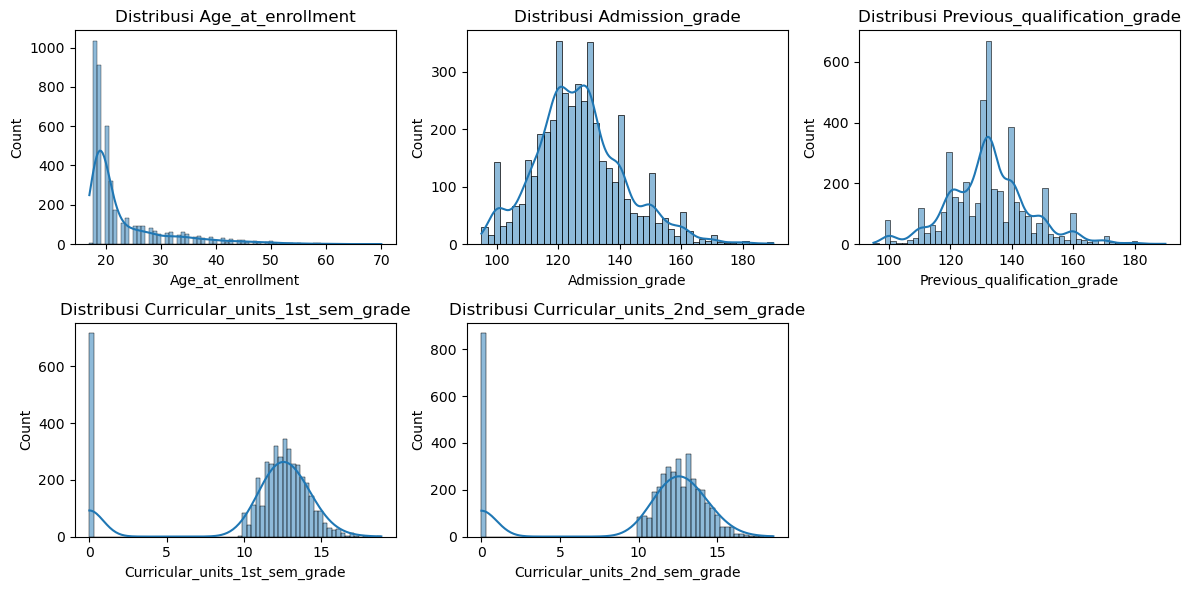

In [76]:
# Histogram untuk beberapa fitur numerik
numerical_columns = ['Age_at_enrollment', 'Admission_grade', 'Previous_qualification_grade', 'Curricular_units_1st_sem_grade', 'Curricular_units_2nd_sem_grade']

plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribusi {col}')
    plt.tight_layout()
plt.show()

Dari distribusi fitur numerik pada histogram di atas, diperoleh bahwa :

1. Age_at_enrollment

   
   Distribusi usia siswa saat pendaftaran menunjukkan pola cenderung condong ke kiri (right-skewed) dengan puncak pada rentang usia sekitar 20 tahun. Hal ini menunjukkan mayoritas siswa berada dalam usia produktif.

3. Admission_grade

   
   Nilai Admission_grade terdistribusi hampir mendekati distribusi normal, dengan puncak pada rentang nilai 120 hingga 130. Ini mengindikasikan mayoritas siswa memiliki performa akademik penerimaan yang stabil dan berada dalam kisaran nilai tersebut.

5. Previous_qualification_grade

   
   Distribusi nilai kualifikasi sebelumnya hampir mendekati distribusi normal, dengan sebagian besar siswa memiliki nilai sekitar 130, menunjukkan konsistensi prestasi akademik sebelum memasuki jenjang pendidikan saat ini.

7. Curricular_units_1st_sem_grade

   
   Distribusi nilai siswa saat semester 1 menunjukkan pola hampir mendekati distribusi normal pada rentang 10 hingga 15 serta pada nilai 0 cenderung tinggi. Hal ini mengindikasikan bahwa sebagian besar siswa memperoleh nilai antara 10 hingga 15, sementara tingginya frekuensi nilai 0 kemungkinan mencerminkan sejumlah siswa yang belum mendapatkan nilai atau mengalami kegagalan pada beberapa mata kuliah di semester tersebut.

4. Curricular_units_2nd_sem_grade

   
   Distribusi nilai siswa saat semester 2 menunjukkan pola hampir mendekati distribusi normal pada rentang 10 hingga 15 serta pada nilai 0 cenderung tinggi. Hal ini mengindikasikan bahwa sebagian besar siswa memperoleh nilai antara 10 hingga 15, sementara tingginya frekuensi nilai 0 kemungkinan mencerminkan sejumlah siswa yang belum mendapatkan nilai atau mengalami kegagalan pada beberapa mata kuliah di semester tersebut.


<Figure size 1500x1200 with 0 Axes>

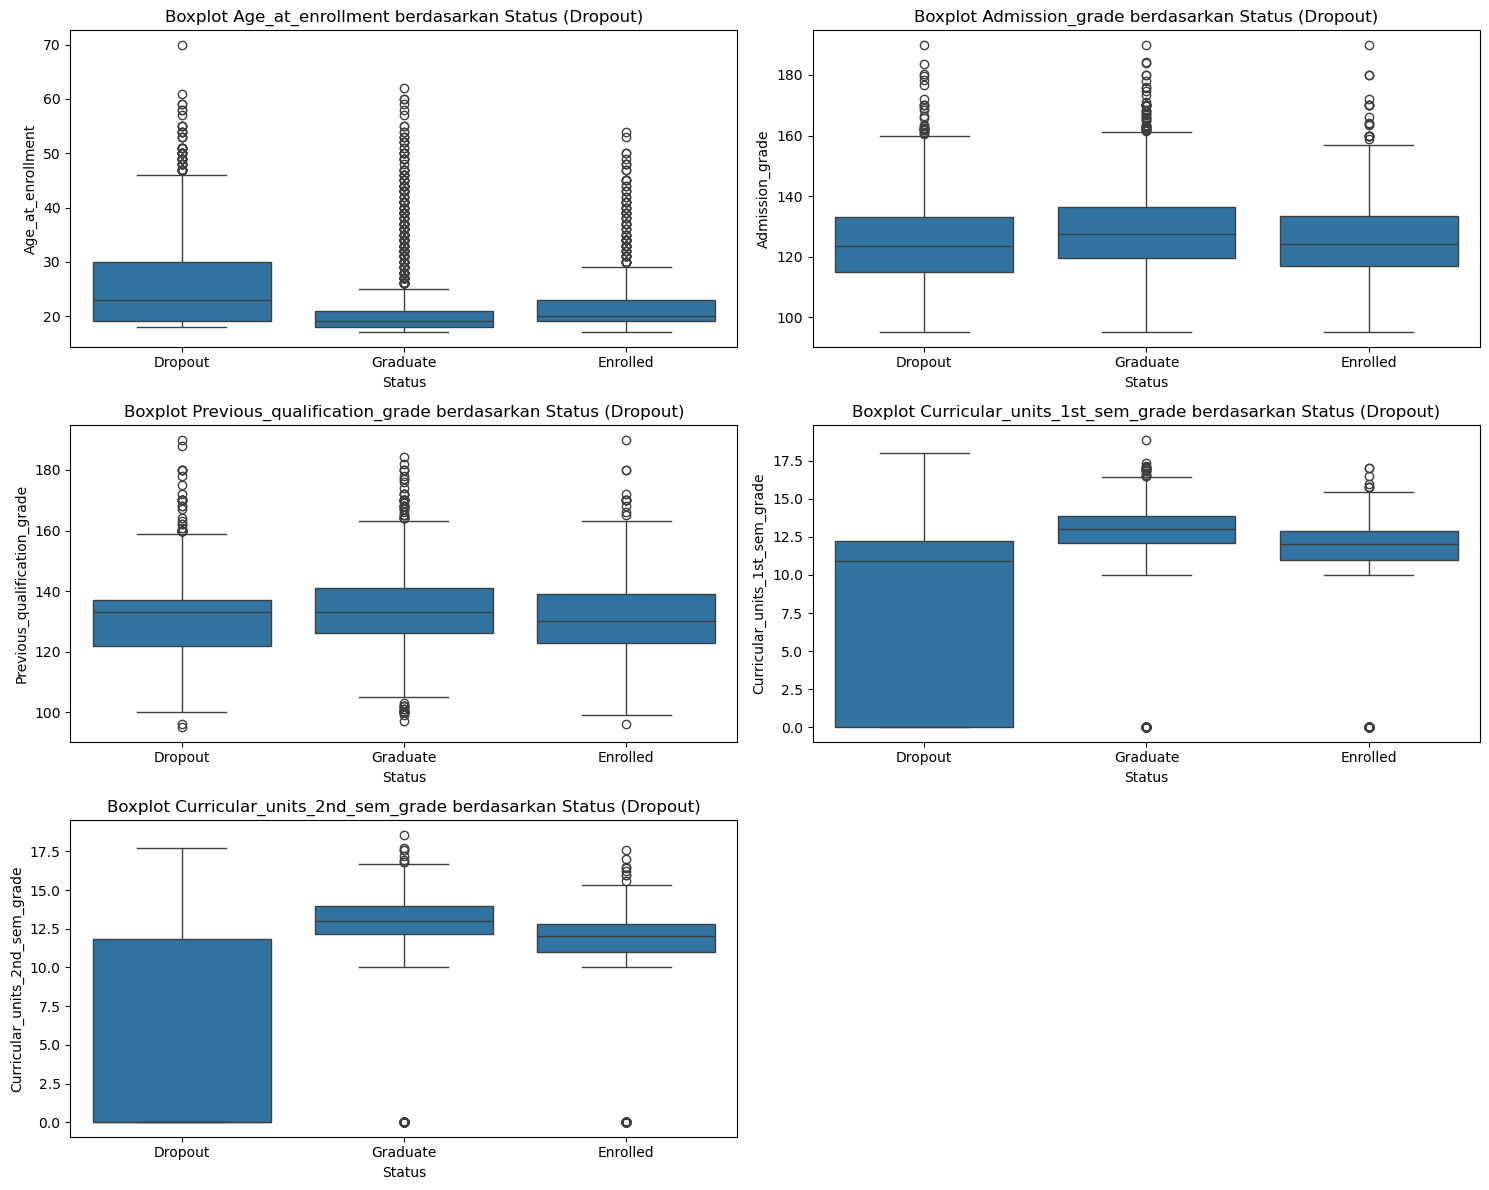

In [82]:
# Boxplot antara fitur numerik dan Status
plt.figure(figsize=(15, 12))
for i, feature in enumerate(numerical_columns, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x='Status', y=feature, data=df)
    plt.title(f'Boxplot {feature} berdasarkan Status (Dropout)')
    plt.xlabel('Status')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

Berdasarkan visualisasi boxplot hubungan antara beberapa fitur numerik dengan kolom Status di atas, didapatkan :

1. Age_at_enrollment vs Status
   - Rata-rata usia siswa yang dropout saat pendaftaran sedikit lebih tinggi dibandingkan dengan siswa yang graduate atau enrolled.
   - Sebaran usia siswa yang dropout juga terlihat lebih luas, dengan beberapa outlier yang usianya jauh lebih tinggi.

2. Admission_grade vs Status
   - Tidak terlihat perbedaan yang signifikan pada nilai ujian masuk antara kelompok siswa yang dropout, graduate, maupun enrolled.
   - Median nilai ujian masuk untuk ketiga kelompok ini relatif serupa (sekitar 130).

3. Previous_qualification_grade vs Status
   - Nilai kualifikasi sebelumnya cenderung lebih rendah pada kelompok siswa yang dropout dibandingkan dengan kelompok graduate dan enrolled.
   - Median nilai kualifikasi sebelumnya untuk kelompok dropout terlihat paling rendah.

4. Curricular_units_1st_sem_grade vs Status
   - Nilai rata-rata mata kuliah di semester pertama cenderung lebih rendah pada kelompok siswa yang dropout dibandingkan dengan kelompok graduate dan enrolled.
   - Hal ini bisa mengindikasikan bahwa performa akademik yang rendah pada semester pertama berkontribusi terhadap keputusan siswa untuk keluar dari program studi, menjadikan metrik ini sebagai indikator awal yang potensial untuk memprediksi risiko dropout.

5. Curricular_units_2nd_sem_grade vs Status
   - Nilai rata-rata mata kuliah di semester kedua cenderung lebih rendah pada kelompok siswa yang dropout dibandingkan dengan kelompok graduate dan enrolled.
   - Hal ini bisa mengindikasikan bahwa performa akademik yang rendah pada semester kedua juga berkontribusi terhadap keputusan siswa untuk keluar dari program studi, menjadikan metrik ini sebagai indikator awal yang potensial untuk memprediksi risiko dropout.

Oleh karena itu, dapat disimpulkan bahwa faktor-faktor seperti usia saat pendaftaran, nilai penerimaan, nilai kualifikasi sebelumnya, serta performa akademik pada semester pertama dan kedua tampaknya berkorelasi dengan tingginya kemungkinan siswa untuk tidak melanjutkan pendidikan (dropout).


Untuk menganalisis korelasi antar fitur numerik lebih lanjut, akan dibuat visualisasi ke dalam bentuk matriks korelasi sebagai berikut

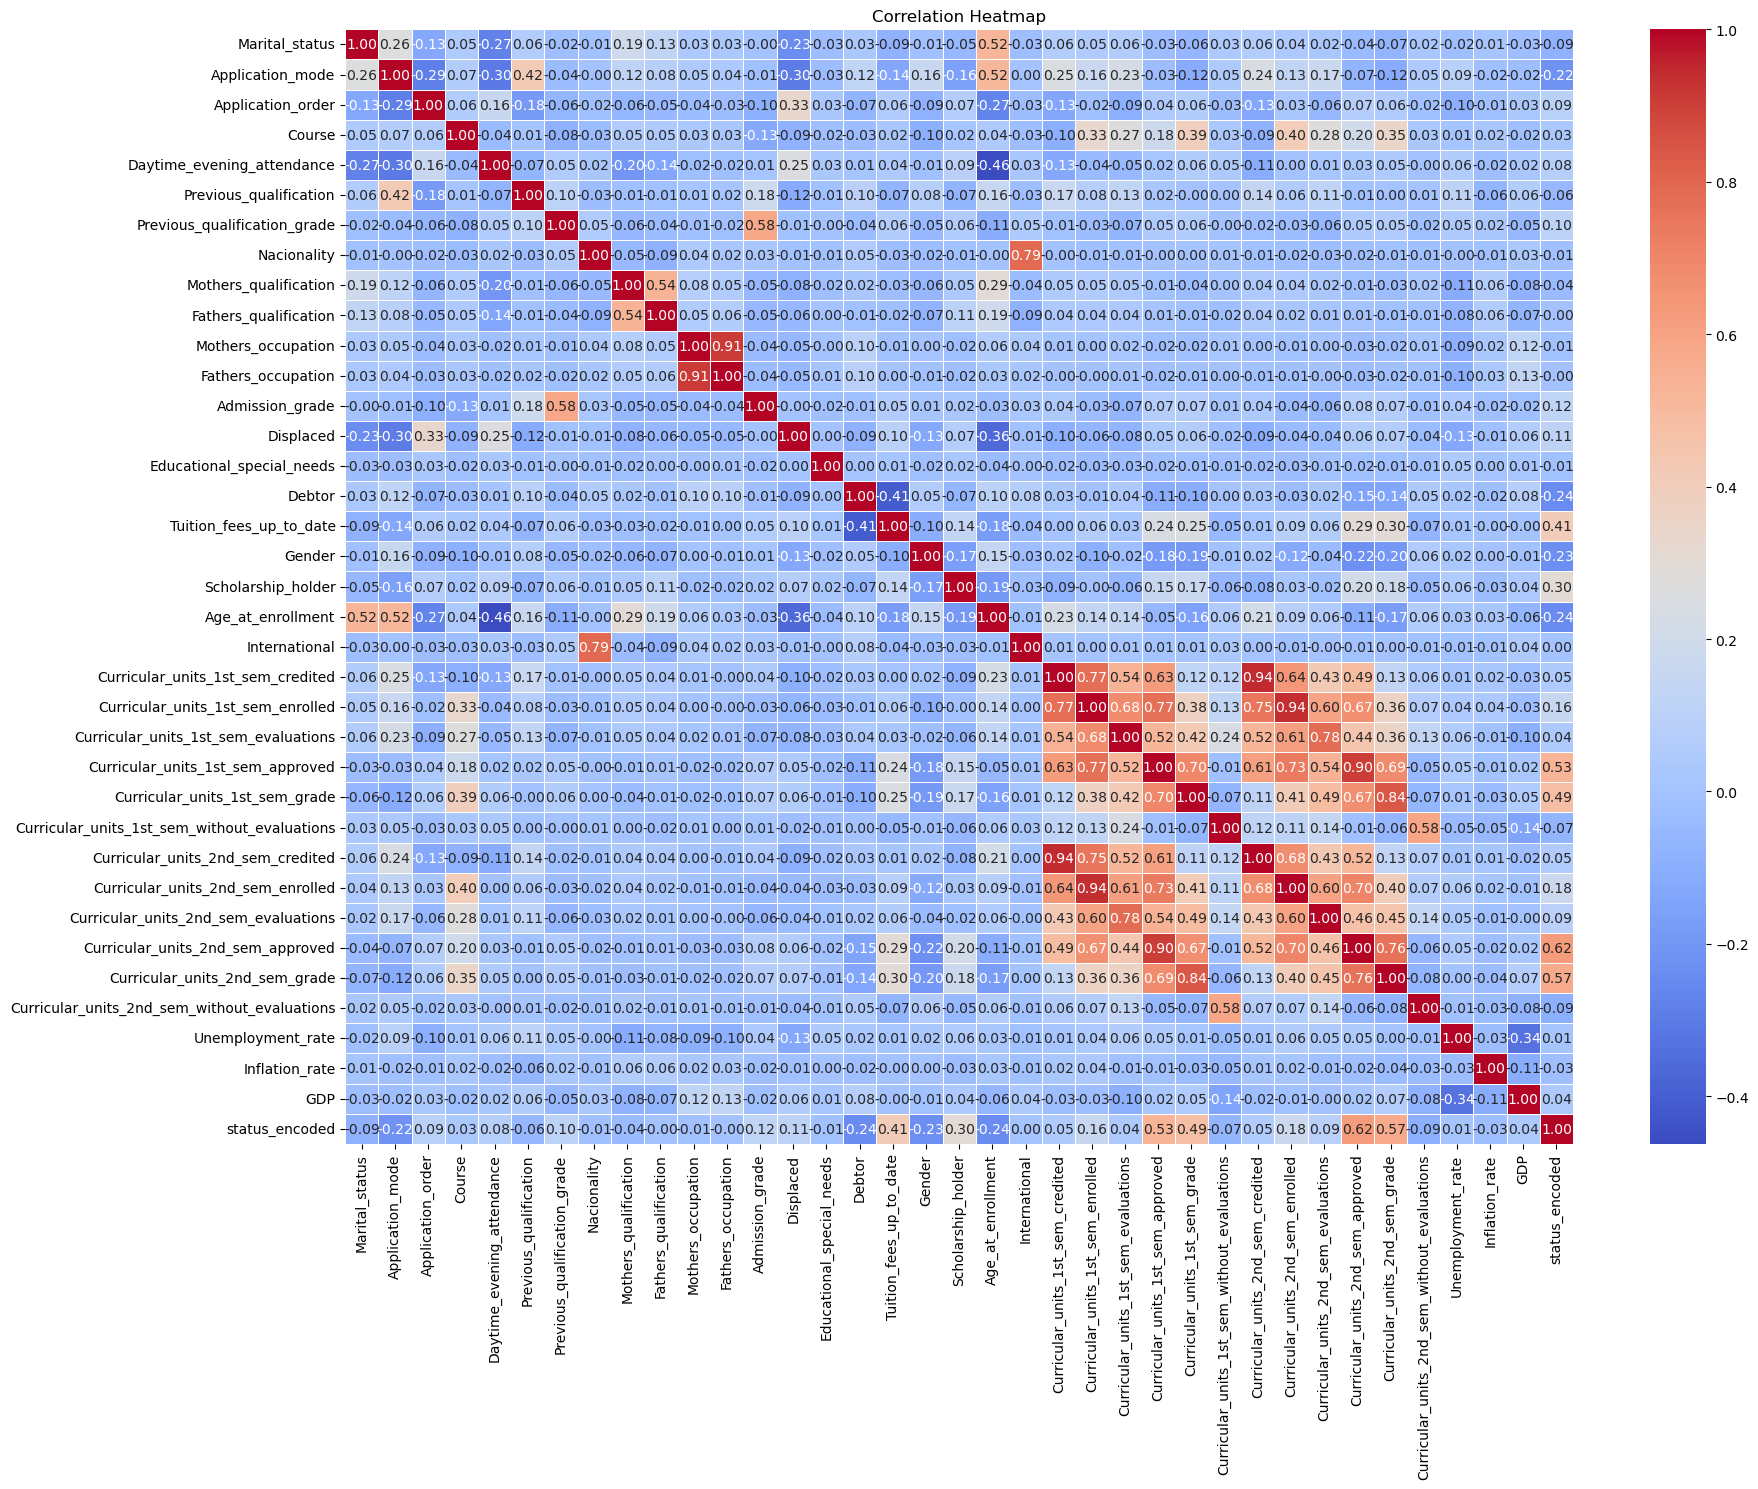

In [87]:
# Korelasi antar fitur numerik
df['Status_num'] = df['Status'].map({
    'Enrolled': 0,
    'Dropout': 1,
    'Graduate': 2
})

# Korelasi antar fitur numerik termasuk kolom Status_num
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Pastikan kolom Status_num ikut masuk
if 'Status_num' not in num_cols:
    num_cols.append('Status_num')

corr_matrix = df[num_cols].corr()

plt.figure(figsize=(19, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap (with Status)')
plt.tight_layout()
plt.show()

Dari matriks korelasi di atas, diketahui bahwa kolom Curricular_units_2nd_sem_approved, Curricular_units_2nd_sem_grade, Curricular_units_1st_sem_approved, Curricular_units_1st_sem_grade, dan Tuition_fees_up_to_date memiliki korelasi yang cukup tinggi dengan Status. Hal ini berarti terdapat hubungan yang cukup kuat antara keberhasilan akademik seperti jumlah mata kuliah yang disetujui dan nilai yang diperoleh serta status pembayaran uang kuliah dengan kelanjutan status siswa (dropout, enrolled, atau graduate). Hal ini mengindikasikan bahwa siswa yang menunjukkan kinerja akademik baik dan memiliki kewajiban finansial yang terpenuhi cenderung lebih besar kemungkinannya untuk menyelesaikan studi, sementara mereka yang gagal dalam banyak mata kuliah atau menunggak pembayaran lebih rentan mengalami dropout.

Sebaliknya, kolom seperti Age_at_enrollment, Debtor, Gender, dan Application_mode memiliki korelasi yang rendah dengan Status dibandingkan kolom lainnya. Hal ini berarti,  faktor-faktor demografis dan administratif seperti usia saat pendaftaran, status utang (debtor), jenis kelamin, dan jalur pendaftaran tampaknya tidak memiliki pengaruh yang signifikan secara langsung terhadap status akhir siswa (dropout, enrolled, atau graduate). Meskipun faktor-faktor ini mungkin tetap relevan dalam konteks tertentu, pengaruhnya terhadap dropout lebih kecil dibandingkan dengan faktor akademik dan finansial.

Selain itu, terdapat pula kolom-kolom yang memiliki tingkat korelasi tinggi antara satu sama lain, antara lain:

- Curricular_units_1st_sem_enrolled dengan Curricular_units_2nd_sem_enrolled  
  Semakin tinggi jumlah mata kuliah yang diambil pada semester pertama, cenderung diikuti oleh jumlah yang tinggi pula pada semester kedua.

- Curricular_units_1st_sem_approved dengan Curricular_units_2nd_sem_approved  
  Semakin tinggi jumlah mata kuliah yang disetujui pada semester pertama, cenderung diikuti oleh jumlah yang tinggi pula pada semester kedua.

- Curricular_units_1st_sem_grade dengan Curricular_units_2nd_sem_grade  
  Semakin tinggi nilai yang diperoleh mahasiswa pada semester pertama, cenderung diikuti oleh nilai yang juga tinggi pada semester kedua. Hal ini menunjukkan adanya konsistensi performa akademik antar semester, yang bisa mengindikasikan bahwa siswa dengan kemampuan belajar yang baik cenderung mempertahankan prestasi mereka di sepanjang tahun ajaran.

## Data Preparation / Preprocessing

### Menangani Missing Value

Karena pada pengecekan missing value sebelumnya menunjukkan tidak adanya missing value pada kolom Status yang merupakan kolom target, maka tidak ada baris yang harus dihapus. Hal ini berarti data sudah bersih sehingga dapat dilanjutkan ke proses encoding.

In [24]:
df.isna().sum()

Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                               0


### Encoding

Karena untuk pembangunan model pertama akan menggunakan seluruh kolom untuk nantinya dilihat mana kolom yang paling berpengaruh terhadap Status, maka akan dilakukan encoding terlebih dahulu pada kolom kategorikal agar fitur dapat direpresentasikan dalam format numerik yang dapat diproses oleh algoritma machine learning. Proses encoding pada kolom Status menggunakan Label Encoding agar nilai kategorikal seperti 'Enrolled', 'Graduate', dan 'Dropout' dapat dikonversi menjadi representasi numerik (misalnya 0, 1, 2) yang dapat dipahami oleh algoritma machine learning tanpa mengubah urutan atau hubungan antar kategori. Label Encoding dipilih karena kolom Status akan digunakan sebagai variabel target dalam klasifikasi, dan metode ini cukup efisien untuk menangani target kategorikal dengan tiga kelas tanpa memperkenalkan dimensi tambahan seperti pada One-Hot Encoding.

In [27]:
from sklearn.preprocessing import LabelEncoder

# Inisialisasi encoder
le = LabelEncoder()

# Salin dataframe
df_encoded = df.copy()

# Lakukan label encoding pada kolom 'status' dan simpan sebagai kolom baru
df_encoded['status_encoded'] = le.fit_transform(df_encoded['Status'])

# Hapus kolom 'status' asli
df_encoded.drop(columns='Status', inplace=True)

# Lihat hasil mapping
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Mapping label:", label_mapping)

Mapping label: {'Dropout': 0, 'Enrolled': 1, 'Graduate': 2}


In [28]:
df_encoded

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,status_encoded
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,2
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,0
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,0
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,2


### Mendeteksi Outlier

Setelah itu, akan dideteksi outlier pada data berdasarkan IQR nya untuk memastikan hasil analisis yang lebih akurat

In [31]:
# Fungsi untuk cek outlier berdasarkan IQR dan mengurutkan berdasarkan jumlah outlier tertinggi

def detect_outliers_iqr(df_encoded, column):
    Q1 = df_encoded[column].quantile(0.25)
    Q3 = df_encoded[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df_encoded[(df_encoded[column] < lower_bound) | (df_encoded[column] > upper_bound)]
    
    # Menyimpan hasil jumlah outlier untuk setiap kolom
    outlier_count = outliers.shape[0]
    return column, outlier_count, outliers

# Simpan hasil outlier untuk semua kolom numerik
outlier_results = []

for col in num_cols:
    column, outlier_count, outliers = detect_outliers_iqr(df_encoded, col)
    outlier_results.append((column, outlier_count))

# Mengurutkan hasil berdasarkan jumlah outlier tertinggi
outlier_results_sorted = sorted(outlier_results, key=lambda x: x[1], reverse=True)

# Menampilkan hasil yang sudah diurutkan
print("Kolom dengan jumlah outlier tertinggi:")
for col, count in outlier_results_sorted:
    print(f'{col}: {count} outliers')


Kolom dengan jumlah outlier tertinggi:
Scholarship_holder: 1099 outliers
Curricular_units_2nd_sem_grade: 877 outliers
Curricular_units_1st_sem_grade: 726 outliers
Previous_qualification: 707 outliers
Curricular_units_1st_sem_credited: 577 outliers
Application_order: 541 outliers
Curricular_units_2nd_sem_credited: 530 outliers
Tuition_fees_up_to_date: 528 outliers
Marital_status: 505 outliers
Debtor: 503 outliers
Daytime_evening_attendance: 483 outliers
Course: 442 outliers
Age_at_enrollment: 441 outliers
Curricular_units_1st_sem_enrolled: 424 outliers
Curricular_units_2nd_sem_enrolled: 369 outliers
Curricular_units_1st_sem_without_evaluations: 294 outliers
Curricular_units_2nd_sem_without_evaluations: 282 outliers
Mothers_occupation: 182 outliers
Curricular_units_1st_sem_approved: 180 outliers
Previous_qualification_grade: 179 outliers
Fathers_occupation: 177 outliers
Curricular_units_1st_sem_evaluations: 158 outliers
Nacionality: 110 outliers
International: 110 outliers
Curricular_uni

In [32]:
# Daftar kolom dengan jumlah outlier tinggi
high_outlier_columns = [
    'Scholarship_holder', 'Curricular_units_2nd_sem_grade', 'Curricular_units_1st_sem_grade',
    'Previous_qualification', 'Curricular_units_1st_sem_credited', 'Application_order',
    'Curricular_units_2nd_sem_credited', 'Tuition_fees_up_to_date', 'Marital_status', 'Debtor',
    'Daytime_evening_attendance', 'Course', 'Age_at_enrollment', 'Curricular_units_1st_sem_enrolled',
    'Curricular_units_2nd_sem_enrolled', 'Curricular_units_1st_sem_without_evaluations',
    'Curricular_units_2nd_sem_without_evaluations', 'Mothers_occupation',
    'Curricular_units_1st_sem_approved', 'Previous_qualification_grade', 'Fathers_occupation',
    'Curricular_units_1st_sem_evaluations', 'Nacionality', 'International',
    'Curricular_units_2nd_sem_evaluations', 'Admission_grade', 'Educational_special_needs',
    'Curricular_units_2nd_sem_approved'
]

# Menampilkan statistik deskriptif
df[high_outlier_columns].describe(include='all').transpose()


,count,mean,std,min,25%,50%,75%,max
Scholarship_holder,4424.0,0.248418,0.432144,0.0,0.00,0.000000,0.000000,1.000000
Curricular_units_2nd_sem_grade,4424.0,10.230206,5.210808,0.0,10.75,12.200000,13.333333,18.571429
Curricular_units_1st_sem_grade,4424.0,10.640822,4.843663,0.0,11.00,12.285714,13.400000,18.875000
Previous_qualification,4424.0,4.577758,10.216592,1.0,1.00,1.000000,1.000000,43.000000
Curricular_units_1st_sem_credited,4424.0,0.709991,2.360507,0.0,0.00,0.000000,0.000000,20.000000
Application_order,4424.0,1.727848,1.313793,0.0,1.00,1.000000,2.000000,9.000000
Curricular_units_2nd_sem_credited,4424.0,0.541817,1.918546,0.0,0.00,0.000000,0.000000,19.000000
Tuition_fees_up_to_date,4424.0,0.880651,0.324235,0.0,1.00,1.000000,1.000000,1.000000
Marital_status,4424.0,1.178571,0.605747,1.0,1.00,1.000000,1.000000,6.000000
Debtor,4424.0,0.113698,0.317480,0.0,0.00,0.000000,0.000000,1.000000


Berdasarkan hasil deteksi outlier yang telah dilakukan, didapatkan bahwa:

Kolom yang memiliki outlier:
Beberapa kolom memiliki jumlah outlier yang cukup signifikan, di antaranya Scholarship_holder (1099 outliers), Curricular_units_2nd_sem_grade (877), Curricular_units_1st_sem_grade (726), Previous_qualification (707), Curricular_units_1st_sem_credited (577), Application_order (541), dan Tuition_fees_up_to_date (528). Kolom-kolom ini menunjukkan adanya data ekstrem yang dapat mencerminkan keberagaman karakteristik siswa atau kemungkinan kesalahan input, namun tetap merepresentasikan kondisi nyata dari populasi siswa.

Kolom tanpa outlier:
Beberapa kolom seperti Application_mode, Mothers_qualification, Fathers_qualification, Displaced, Gender, Unemployment_rate, Inflation_rate, dan GDP tidak memiliki outlier. Ini menunjukkan bahwa distribusi data pada kolom-kolom tersebut cenderung stabil dan berada dalam rentang yang wajar.

Penanganan outlier:
Karena sebagian besar kolom dengan jumlah outlier tinggi seperti Curricular_units_1st_sem_grade, Scholarship_holder, Previous_qualification, dan Tuition_fees_up_to_date merupakan kolom yang memuat nilai-nilai asli dan mencerminkan kondisi aktual siswa, maka outlier tidak akan dihapus atau diimputasi dalam tahap awal ini. Keberadaan outlier akan tetap dipertahankan untuk menjaga integritas data dan memungkinkan model mempelajari variasi yang relevan dari data tersebut.

### Standardisasi Fitur

Sebelum membangun model, dilakukan proses standardisasi untuk menormalkan skala fitur numerik agar setiap fitur memiliki kontribusi yang seimbang terhadap model. Standardisasi dilakukan menggunakan StandardScaler dari scikit-learn. Selain itu, target variabel Status juga dikonversi menjadi format biner, dengan nilai 1 untuk siswa yang dropout dan 0 untuk siswa yang enrolled maupun graduate, agar dapat digunakan dalam klasifikasi biner. Langkah ini dipilih karena klasifikasi biner lebih efektif dalam konteks prediksi dropout, dimana fokus utama adalah membedakan antara siswa yang berisiko berhenti dan yang tidak. Pendekatan ini memudahkan evaluasi model dan memungkinkan penerapan teknik penanganan ketidakseimbangan kelas, sehingga model dapat lebih sensitif dalam mengidentifikasi siswa yang kemungkinan besar akan dropout.

In [35]:
from sklearn.preprocessing import StandardScaler

# Memilih fitur numerik (kecuali target)
X = df_encoded.drop(columns=['status_encoded'])
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[numerical_cols])

# Membuat target biner (1 = Dropout, 0 = Enrolled/Graduate)
y = df_encoded['status_encoded'].apply(lambda x: 1 if x == 0 else 0)

## Modeling

Selanjutnya, akan dipersiapkan data untuk analisis dengan memisahkan fitur dan target. Fitur yang ada pada dataset akan disimpan dalam variabel X, sementara target, yaitu kolom Status, akan disimpan dalam variabel y. Setelah itu, dataset dibagi menjadi data latih dan data uji menggunakan metode train-test split, dengan proporsi data uji sebesar 20%. Lalu, model klasifikasi Random Forest akan dilatih menggunakan data latih dan kemudian diuji menggunakan data uji. Random Forest dipilih karena kemampuannya dalam menangani data yang kompleks dan besar, serta memberikan hasil yang akurat dengan menggunakan ensemble learning untuk mengurangi overfitting. Selain itu, Random Forest juga mampu memberikan estimasi pentingnya fitur-fitur yang digunakan dalam model. Setelah model berhasil dilatih dan diuji, akan ditentukan fitur-fitur yang mempengaruhi keputusan model dengan menampilkan grafik yang menunjukkan 10 fitur terpenting dalam memprediksi tingkat dropout, yang nantinya juga akan digunakan pada business dashboard untuk memonitor performa akademik siswa.

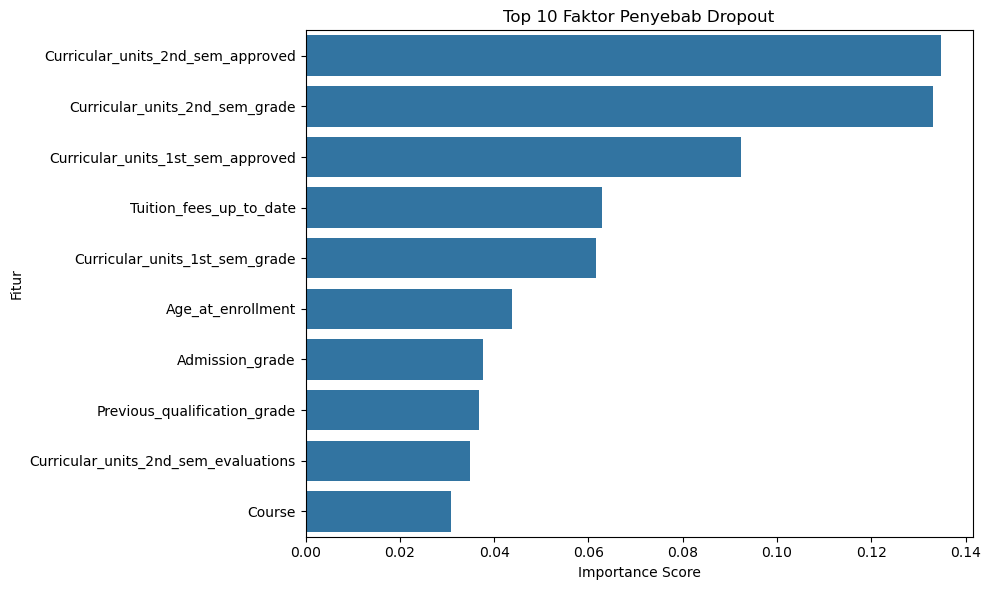

In [38]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

# Modeling
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Prediksi dan evaluasi
y_pred = model.predict(X_test)

# Feature importance
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Visualisasi
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title('Top 10 Faktor Penyebab Dropout')
plt.xlabel('Importance Score')
plt.ylabel('Fitur')
plt.tight_layout()
plt.show()

Setelah didapatkan sepuluh fitur teratas berdasarkan korelasi dan relevansi terhadap variabel target untuk meningkatkan performa model serta mengurangi kompleksitas data, dataset kemudian dibagi menjadi data latih dan data uji dengan proporsi 80:20 untuk menguji kemampuan generalisasi model. Selanjutnya, fitur-fitur numerik pada kedua subset tersebut distandarisasi menggunakan StandardScaler agar memiliki skala yang seragam. Model klasifikasi Logistic Regression kemudian dilatih menggunakan data latih yang telah distandarisasi, dan hasil prediksi pada data uji akan digunakan untuk evaluasi performa model. Pemilihan Logistic Regression dilakukan karena model ini lebih sederhana, lebih cepat, dan lebih mudah diinterpretasikan dibandingkan Random Forest, sehingga cocok untuk membangun model akhir setelah fitur terbaik diperoleh dari Random Forest.

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Tentukan top 10 fitur
top_10_features = [
    'Curricular_units_2nd_sem_approved',
    'Curricular_units_2nd_sem_grade',
    'Curricular_units_1st_sem_approved',
    'Tuition_fees_up_to_date',
    'Curricular_units_1st_sem_grade',
    'Age_at_enrollment',
    'Admission_grade',
    'Previous_qualification_grade',
    'Curricular_units_2nd_sem_evaluations',
    'Course' 
]

# Ambil subset dari df_encoded
X = df_encoded[top_10_features]
y = df_encoded['status_encoded'].apply(lambda x: 1 if x == 0 else 0)

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)

# Prediksi dan evaluasi
y_pred = logreg.predict(X_test_scaled)

## Evaluation

In [41]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[575  26]
 [ 89 195]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.96      0.91       601
           1       0.88      0.69      0.77       284

    accuracy                           0.87       885
   macro avg       0.87      0.82      0.84       885
weighted avg       0.87      0.87      0.87       885



Berdasarkan hasil dari classification report dan confusion matrix, model Logistic Regression menunjukkan kinerja yang baik dalam memprediksi tingkat dropout siswa. Akurasi keseluruhan model mencapai 87%, namun terdapat ketidakseimbangan dalam kemampuan model dalam memprediksi kedua kelas. Precision untuk kelas 0 (tidak terjadi dropout) sangat tinggi yaitu 0.87, dengan recall yang mendekati sempurna (0.96), menunjukkan bahwa model sangat baik dalam mengidentifikasi siswa yang tidak memutuskan untuk dropout. Namun, untuk kelas 1 (terjadi dropout), recallnya rendah (0.69) dan f1-score-nya juga sedang (0.77), menunjukkan bahwa model masih kesulitan dalam mengidentifikasi siswa yang benar-benar akan dropout. Hal ini bisa disebabkan oleh ketidakseimbangan data dimana jumlah siswa yang dropout lebih sedikit dibandingkan yang tidak dropout, sehingga model cenderung lebih fokus pada kelas mayoritas. Oleh karena itu, diperlukan strategi lebih lanjut seperti penyesuaian threshold, penggunaan teknik oversampling/undersampling, atau eksplorasi model lain untuk meningkatkan kemampuan deteksi dropout secara spesifik.

## Conclusion

Berdasarkan analisis data siswa dan pengembangan dashboard **"Student Performance and Dropout Monitoring"**, diperoleh beberapa kesimpulan utama sebagai berikut:

1. Berdasarkan analisis feature importance menggunakan model klasifikasi dan pengamatan visualisasi data, ditemukan bahwa 10 faktor utama yang paling memengaruhi kemungkinan siswa mengalami dropout adalah:
   - **Curricular_units_2nd_sem_approved**: Siswa yang gagal menyelesaikan mata kuliah di semester 2 cenderung memiliki risiko dropout lebih tinggi.
   - **Curricular_units_2nd_sem_grade**: Nilai rendah pada semester 2 menjadi indikator kuat potensi ketidaklulusan.
   - **Curricular_units_1st_sem_approved**: Jumlah mata kuliah semester 1 yang diselesaikan juga menjadi penentu penting terhadap kelulusan.
   - **Tuition_fees_up_to_date**: Siswa yang tidak membayar uang kuliah secara tepat waktu memiliki kemungkinan besar untuk dropout.
   - **Curricular_units_1st_sem_grade**: Nilai akademik semester 1 yang rendah mengindikasikan awal dari potensi kegagalan studi.
   - **Age_at_enrollment**: Usia saat mendaftar memengaruhi performa belajar, usia terlalu muda atau terlalu tua memiliki tantangan tersendiri.
   - **Admission_grade**: Nilai masuk yang rendah menunjukkan kesiapan akademik awal yang minim, meningkatkan risiko dropout.
   - **Previous_qualification_grade**: Latar belakang pendidikan sebelumnya juga berkontribusi dalam membentuk kesiapan belajar siswa.
   - **Curricular_units_2nd_sem_evaluations**: Banyaknya evaluasi di semester 2 menunjukkan beban akademik yang berpotensi memengaruhi performa.
   - **Course**: Program studi tertentu memiliki tingkat dropout yang lebih tinggi, menandakan perlunya evaluasi kurikulum atau dukungan akademik.

2. Untuk memprediksi secara dini siswa yang berisiko tidak lulus tepat waktu, institusi dapat menggunakan model prediktif berbasis data, seperti yang dilakukan dengan Logistic Regression. Model ini, setelah dilatih dengan data historis, dapat memberikan prediksi yang cukup akurat mengenai kemungkinan status kelulusan siswa berdasarkan fitur-fitur penting yang telah diidentifikasi, dengan tingkat akurasi yang memadai yaitu 87%.

3.  Dashboard yang dikembangkan menyajikan data interaktif untuk menggambarkan hubungan antara berbagai variabel dengan status kelulusan siswa. Visualisasi ini mencakup distribusi nilai, jumlah mata kuliah yang disetujui, serta status pembayaran uang kuliah yang membantu mengidentifikasi pola dropout sejak semester awal.

Secara keseluruhan, dengan membangun model prediktif yang efektif dan memanfaatkan analisis data, Jaya Jaya Institut dapat mengidentifikasi siswa yang berisiko tidak lulus tepat waktu lebih awal, sehingga dapat memberikan intervensi dan dukungan yang tepat sasaran untuk meningkatkan keberhasilan akademik. Hal ini akan membantu meningkatkan efisiensi proses pembinaan siswa, memperbaiki tingkat kelulusan tepat waktu, serta meningkatkan reputasi institusi melalui peningkatan kualitas pendidikan dan kepuasan siswa secara keseluruhan.

In [47]:
import pickle

# Simpan model
with open('model.pkl', 'wb') as f:
    pickle.dump(logreg, f)

# Simpan scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Simpan urutan fitur
with open('model_features.pkl', 'wb') as f:
    pickle.dump(X_train.columns.tolist(), f)


In [64]:
!pip freeze > requirements.txt